In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as gb
from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# reading data from csv
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = train.copy()

In [5]:
# data[["Survived"]].sum()
women  = data[data["Sex"] == "female"]["Survived"]
women.sum()

233

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# checking the percentage of missing data
round(((train.isnull().sum())/train.shape[0]) * 100, 2)
# len(train)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

<AxesSubplot:>

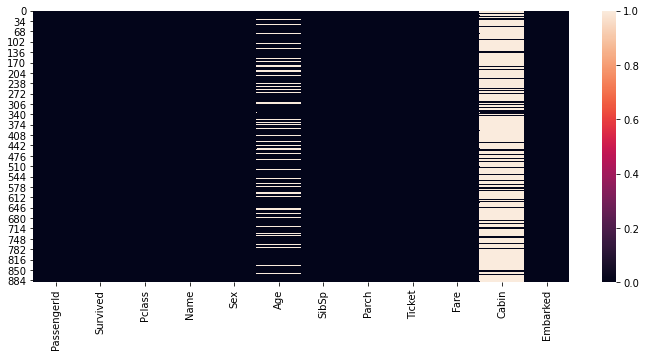

In [10]:
# visualizing missing data
plt.figure(figsize=(12,5))
sns.heatmap(train.isnull())

In [11]:
# checking the distribution of survival in percentage
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


><li> Analyse age column - fill outliers, fill missing values</li>
><li> Analyse fare column - outliers, </li>

In [14]:
age_mean = round(data["Age"].mean())
age_mean

30

In [15]:
data["Age"]= data["Age"].fillna(age_mean)

In [16]:
round(data["Age"].mean())

30

<AxesSubplot:xlabel='Age'>

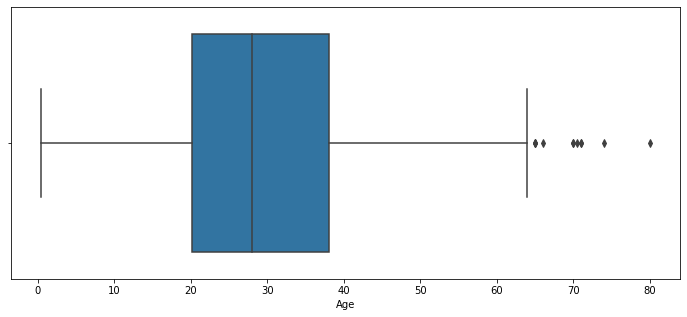

In [17]:
# visualisation with fillna
plt.figure(figsize=(12,5))
sns.boxplot(data=train , x="Age", )

<AxesSubplot:xlabel='Age', ylabel='Count'>

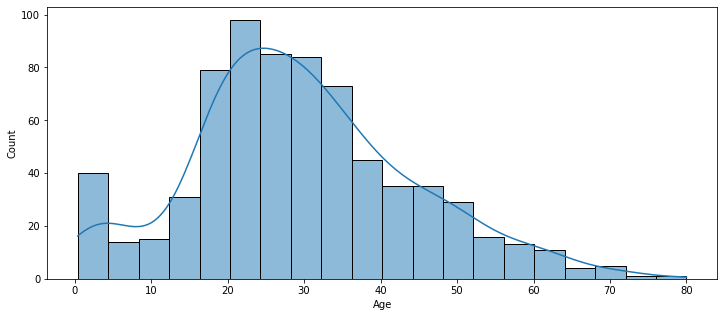

In [18]:
plt.figure(figsize=(12,5))
sns.histplot(data=train , x="Age",kde=True )

In [19]:
# removing outliers with interquatile range

In [20]:
Q1 = np.percentile(data["Age"], 25)
Q3 = np.percentile(data["Age"], 75)

In [21]:
Q1

22.0

In [22]:
data.groupby("Survived")['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [23]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# dropping unwanted column
drop_cols = ["Name","Cabin","PassengerId","Ticket"]
data.drop(drop_cols, axis=1, inplace=True)

In [25]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
data2 = pd.get_dummies(data, columns=["Sex","Embarked"], drop_first=True)

<AxesSubplot:>

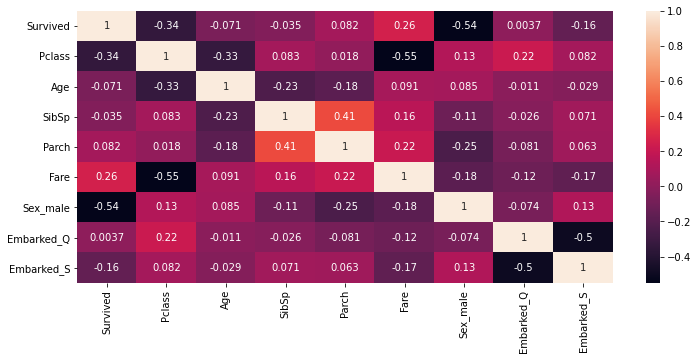

In [28]:
# plotting heatmap of corr
plt.figure(figsize=(12,5))
sns.heatmap(data2.corr(), annot=True)

# Feature Selection

In [29]:
# X = data2.drop("Survived", axis=1 )
# y = data2.Survived

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)

In [30]:
# print(X_train.shape)
# print(y_train.shape)

# Model Selection

# Feature Selection

In [31]:
X = data2.drop(["Survived","Parch","Embarked_Q","SibSp"], axis=1 )
y = data2.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)

# Using a different model - Random forrest

In [32]:
model_forest = RandomForestClassifier()

In [33]:
model_forest.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred_new = model_forest.predict(X_test)

In [35]:
y_pred_new

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.81      0.75      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Survived'>

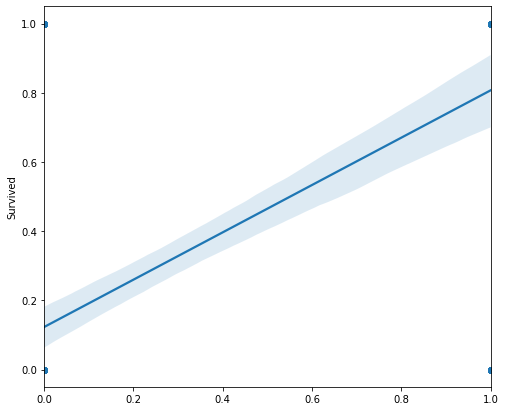

In [37]:
plt.figure(figsize=(8,7))
sns.regplot(y_pred_new , y_test)

### installing xgboost

In [39]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.6.1


 # Using xgboost

In [40]:
from xgboost import XGBClassifier

In [47]:
# fit model no training data
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
y_pred_xgboost = model_xgboost.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.81      0.75      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



# Hyper parameter tunning

In [ ]:
model_forest = RandomForestClassifier()

In [50]:
param_grid = {"n_estimators":[100,200,300,400,500],
             "criterion":["gini", "entropy"],
             "min_samples_leaf":[1,2,4,5],
             "max_features":["auto","sqrt","log2"]}

In [52]:
grid = GridSearchCV(model_forest, param_grid, cv=3)

In [53]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [54]:
grid.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [61]:
model_forest2 =RandomForestClassifier(criterion ='entropy',
 max_features= 'auto',
 min_samples_leaf= 2,
 n_estimators= 300)

In [62]:
model_forest2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       n_estimators=300)

In [63]:
y_pred_f = model_forest2.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       118
           1       0.85      0.75      0.80        61

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.87       179



# Tuning Xgboost 

In [72]:
model_xgboost1 = XGBClassifier()
model_xgboost1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
param_grid2 = {"n_estimators":[100,200,300,400,500],
             "max_depth":[2,5],
             "min_child_weight":[1,2,4,5],
             "gamma":[2,5,11]}

In [74]:
grid2 = GridSearchCV(model_xgboost1, param_grid2, cv=3)

In [75]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                   

In [76]:
grid2.best_params_

{'gamma': 2, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100}

In [77]:
model_xgboost1 = XGBClassifier(gamma=2,
                               max_depth=2,
                               min_child_weight=5,
                               n_estimators= 100)
model_xgboost1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [80]:
y_pred_x1 = model_xgboost1.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred_x1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       118
           1       0.89      0.67      0.77        61

    accuracy                           0.86       179
   macro avg       0.87      0.81      0.83       179
weighted avg       0.86      0.86      0.85       179



In [83]:
print(classification_report(y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.81      0.75      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [85]:
ntest.head()

NameError: name 'ntest' is not defined

In [86]:
ntest = test.drop(drop_cols, axis=1)
ntest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [87]:
ntest["Age"].fillna(age_mean, inplace=True)

In [88]:
ntest["Fare"].fillna(ntest["Fare"].mean(), inplace=True)

In [89]:
ntest = pd.get_dummies(ntest,columns=["Sex", "Embarked"], drop_first=True)

In [90]:
X_val = ntest.drop(["Parch","Embarked_Q","SibSp"], axis=1 )



In [91]:
X_val.head(1)

,Pclass,Age,Fare,Sex_male,Embarked_S
0,3,34.5,7.8292,1,0


In [92]:
X_train.head(1)

,Pclass,Age,Fare,Sex_male,Embarked_S
333,3,16.0,18.0,1,1


In [93]:
predictdf = test[["PassengerId"]]
predictdf.head(2)

,PassengerId
0,892
1,893


In [96]:
y_pred_x11 = model_xgboost1.predict(X_val)
# print(classification_report(X_val, X_pred))

In [98]:
predictdf["Survived"] = y_pred_x11

<ipython-input-98-86e0bd7f8f07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictdf["Survived"] = y_pred_x11


In [101]:
predictdf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [103]:
predictdf.to_csv("titanic2.csv",index=False)

In [104]:
pd.read_csv("titanic1.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
